### Set Up

In [1]:
import numpy as np               
import pandas as pd              
import seaborn as sn             
from scipy import stats         
import calendar
from datetime import datetime   
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [5]:
train["count"].describe() #Dependent Variable in this case

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

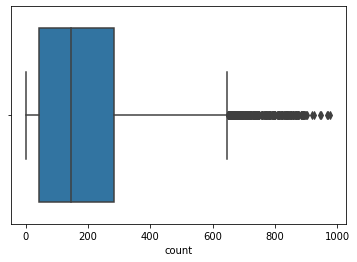

In [6]:
sn.boxplot(train["count"])

In [7]:
train_withoutliers=train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] #Distribution without outliers

Skewness :1.0283436063589986 
Kurt : 0.42340096046253795


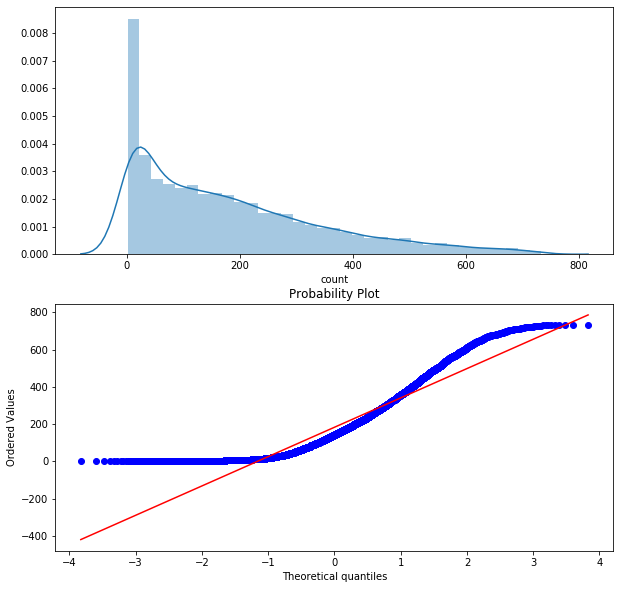

In [8]:
fig,ax=plt.subplots(2,1,figsize=(10,10)) 
sn.distplot(train_withoutliers["count"],ax=ax[0])  
stats.probplot(train_withoutliers["count"],dist="norm",fit=True,plot=ax[1])
print('Skewness :{0} '.format(train_withoutliers['count'].skew()))
print('Kurt : {0}'.format(train_withoutliers['count'].kurt()))

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.364739645924417, 4.591363690454027, 0.9611793780126949))

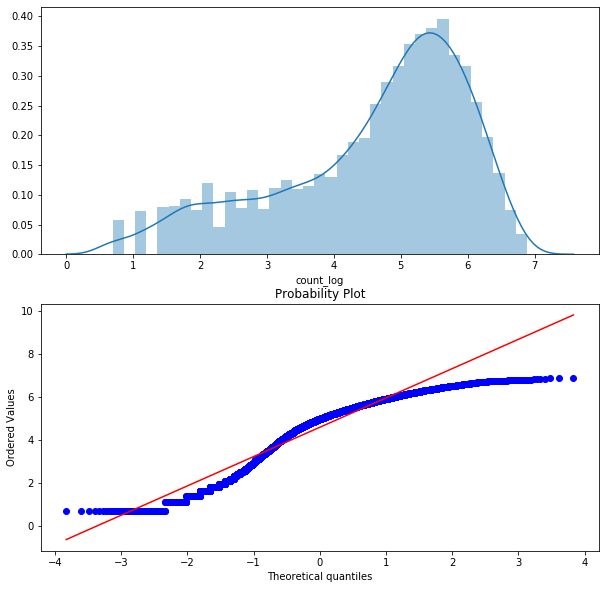

In [9]:
fig,ax=plt.subplots(2,1,figsize=(10,10))

train['count_log'] = np.log1p(train['count'])
sn.distplot(train['count_log'],ax=ax[0])
stats.probplot(train["count_log"], dist='norm', fit=True, plot=ax[1])

In [10]:
train_withoutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10739 non-null object
season        10739 non-null int64
holiday       10739 non-null int64
workingday    10739 non-null int64
weather       10739 non-null int64
temp          10739 non-null float64
atemp         10739 non-null float64
humidity      10739 non-null int64
windspeed     10739 non-null float64
casual        10739 non-null int64
registered    10739 non-null int64
count         10739 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [11]:
data=pd.concat([train_withoutliers,test],ignore_index=True)
data.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(17232, 12)

### Feature Engineering

In [12]:
data['datetime'] = pd.to_datetime(data['datetime'],errors='coerce')

data['year'] = data['datetime'].apply(lambda x: x.year)
data["year"].value_counts()

2011    8645
2012    8587
Name: year, dtype: int64

In [13]:
data['hour'] = data['datetime'].apply(lambda x: x.hour).astype('int')
data['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [14]:
data['weekday'] = data['datetime'].apply(lambda x: x.weekday())

data['date'] = data['datetime'].apply(lambda x: x.date())
data[["date","weekday"]].head()

,date,weekday
0,2011-01-01,5
1,2011-01-01,5
2,2011-01-01,5
3,2011-01-01,5
4,2011-01-01,5


In [15]:
data['month'] = data['datetime'].apply(lambda x: x.month)

In [16]:
data.dtypes

atemp                float64
casual               float64
count                float64
datetime      datetime64[ns]
holiday                int64
humidity               int64
registered           float64
season                 int64
temp                 float64
weather                int64
windspeed            float64
workingday             int64
year                   int64
hour                   int64
weekday                int64
date                  object
month                  int64
dtype: object

### Data Analysis

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'Distribution of windspeed')]

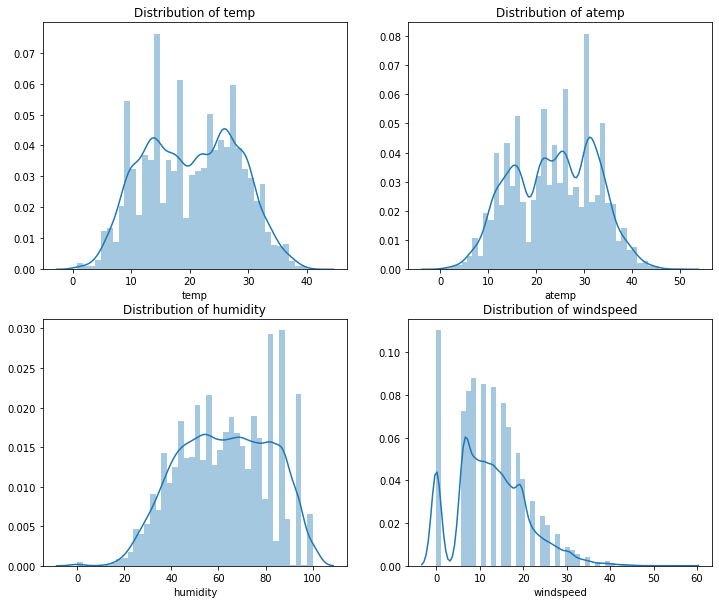

In [17]:
fig,axes=plt.subplots(2,2)
fig.set_size_inches(12,10)

sn.distplot(data["temp"],ax=axes[0,0])
sn.distplot(data["atemp"],ax=axes[0,1])
sn.distplot(data["humidity"],ax=axes[1,0])
sn.distplot(data["windspeed"],ax=axes[1,1])

axes[0,0].set(xlabel="temp",title="Distribution of temp",)
axes[0,1].set(xlabel="atemp",title="Distribution of atemp")
axes[1,0].set(xlabel='humidity',title='Distribution of humidity')
axes[1,1].set(xlabel='windspeed',title='Distribution of windspeed')

In [18]:
from sklearn.ensemble import RandomForestRegressor

data["windspeed_rfr"]=data["windspeed"]

dataWind0 = data[data["windspeed_rfr"]==0]
dataWindNot0 = data[data["windspeed_rfr"]!=0]

rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)

windColumns = ["season","weather","humidity","month","temp","year","atemp"]

rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed_rfr"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])

dataWind0.loc[:,"windspeed_rfr"] = wind0Values

data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

data.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(17232, 18)

Text(0.5, 1.0, 'Distribution of windspeed')

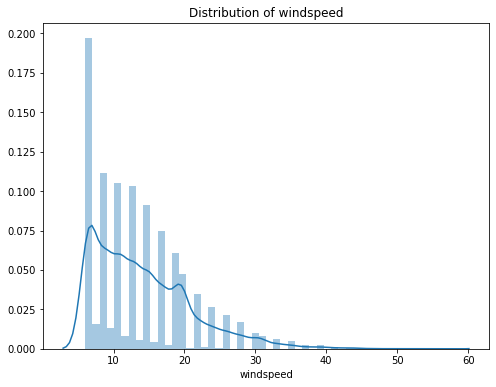

In [19]:
plt.figure(figsize=(8,6))
sn.distplot(data["windspeed_rfr"])
plt.xlabel("windspeed")
plt.title("Distribution of windspeed")

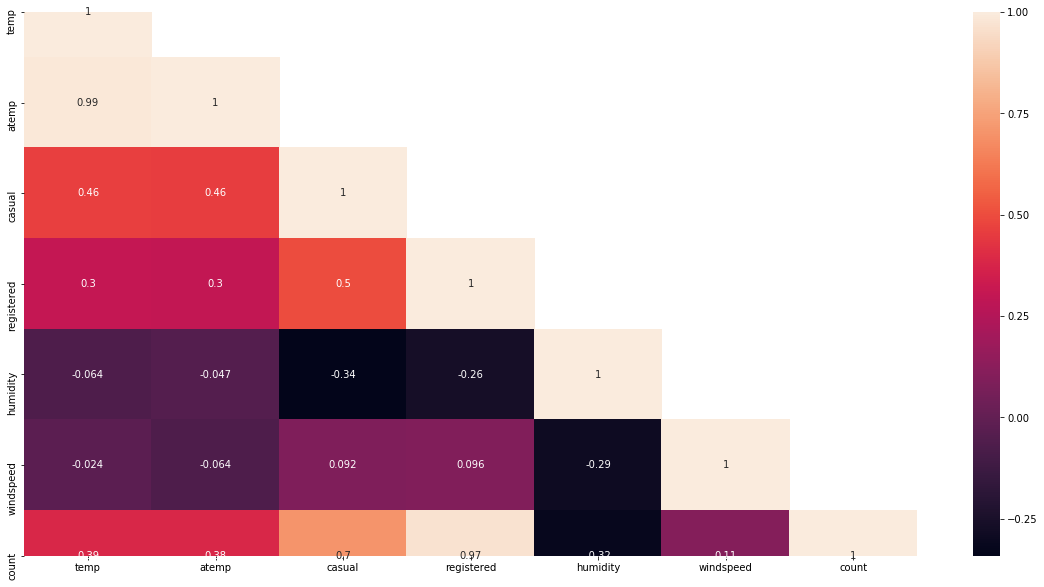

In [20]:
numeric=["temp","atemp","casual","registered","humidity","windspeed","count"]

corrmask=data[numeric].corr()
mask=np.array(corrmask)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)

sn.heatmap(corrmask,mask=mask,vmax=1,annot=True)

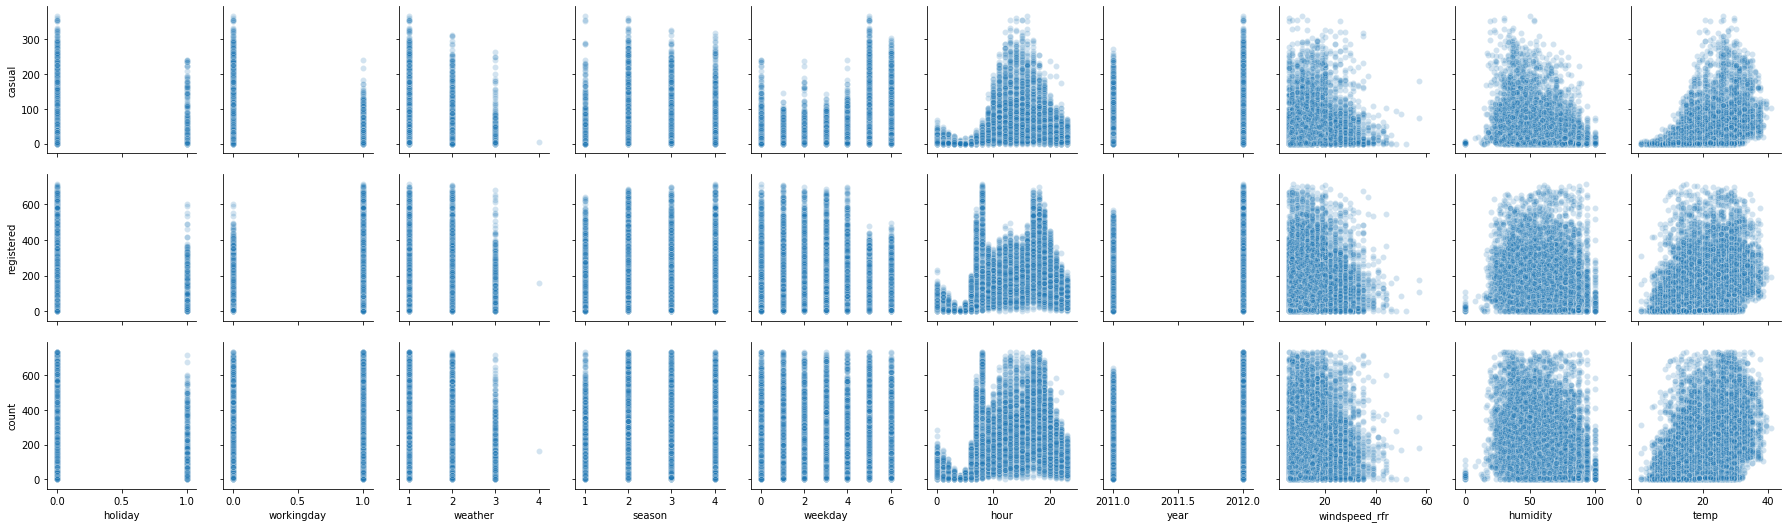

In [21]:
sn.pairplot(data,x_vars=["holiday","workingday","weather","season",
                          "weekday","hour","year","windspeed_rfr","humidity","temp"],
                   y_vars=["casual","registered","count"], plot_kws={'alpha': 0.2})

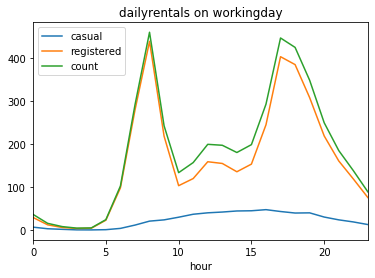

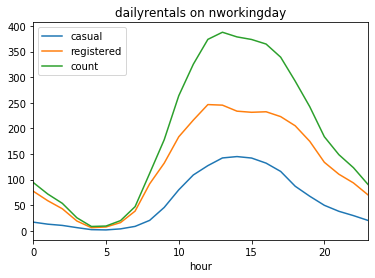

In [22]:
workingday_df=data[data['workingday']==1]
nworkingday_df=data[data['workingday']==0]


workingday_df = workingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                    'registered':'mean',
                                                                    'count':'mean'})

nworkingday_df = nworkingday_df.groupby(['hour'], as_index=True).agg({'casual':'mean',
                                                                      'registered':'mean',
                                                                      'count':'mean'})

workingday_df.plot(title="dailyrentals on workingday") 

nworkingday_df.plot(title="dailyrentals on nworkingday") 

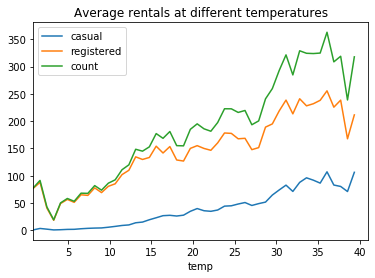

In [23]:
temp_rentals=data.groupby(["temp"],as_index=True).agg({"casual":"mean","registered":"mean","count":"mean"})
temp_rentals.plot(title="Average rentals at different temperatures")

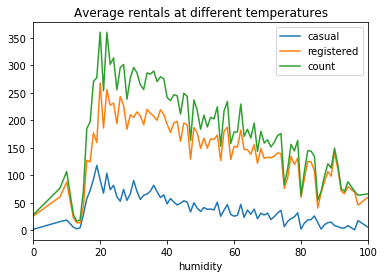

In [24]:
humidity_rentals=data.groupby(["humidity"],as_index=True).agg({"casual":"mean","registered":"mean","count":"mean"})
humidity_rentals.plot(title="Average rentals at different temperatures")

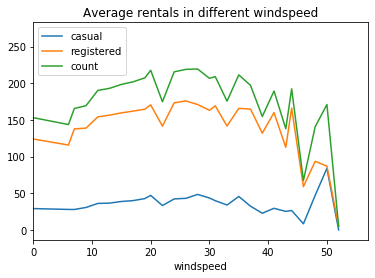

In [25]:
windspeed_rentals=data.groupby(["windspeed"],as_index=True).agg({"casual":"mean",
                                                                "registered":"mean",
                                                                "count":"mean"})
windspeed_rentals.plot(title="Average rentals in different windspeed")

In [26]:
df1=data[data['windspeed']>40]
df2=df1[df1["count"]>170]
df2

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,year,hour,weekday,date,month,windspeed_rfr
647,22.725,25.0,243.0,2011-02-14 17:00:00,0,33,218.0,1,18.86,1,40.9973,1,2011,17,0,2011-02-14,2,40.9973
648,20.455,11.0,205.0,2011-02-14 18:00:00,0,40,194.0,1,16.40,1,40.9973,1,2011,18,0,2011-02-14,2,40.9973
760,22.725,102.0,196.0,2011-02-19 14:00:00,0,15,94.0,1,18.86,1,43.9989,0,2011,14,5,2011-02-19,2,43.9989
761,21.970,84.0,171.0,2011-02-19 15:00:00,0,16,87.0,1,18.04,1,50.0021,0,2011,15,5,2011-02-19,2,50.0021
1276,32.575,83.0,366.0,2011-04-04 17:00:00,0,23,283.0,2,30.34,1,40.9973,1,2011,17,0,2011-04-04,4,40.9973
1671,32.575,50.0,194.0,2011-05-03 13:00:00,0,58,144.0,2,28.70,2,40.9973,1,2011,13,1,2011-05-03,5,40.9973
2465,37.120,181.0,358.0,2011-07-03 17:00:00,0,49,177.0,3,32.80,3,56.9969,0,2011,17,6,2011-07-03,7,56.9969
2466,37.120,74.0,181.0,2011-07-03 18:00:00,0,49,107.0,3,32.80,3,56.9969,0,2011,18,6,2011-07-03,7,56.9969
2970,35.605,63.0,194.0,2011-08-07 17:00:00,0,74,131.0,3,30.34,3,43.0006,0,2011,17,6,2011-08-07,8,43.0006
3531,23.485,22.0,244.0,2011-09-15 18:00:00,0,67,222.0,3,19.68,3,40.9973,1,2011,18,3,2011-09-15,9,40.9973


In [27]:
data[data['count'].notnull()].groupby(['season','year'])[['casual','registered']].sum()

casual  registered
season year                     
1      2011  13694.0     81437.0
       2012  27451.0    186838.0
2      2011  47694.0    172312.0
       2012  77974.0    259084.0
3      2011  62036.0    193212.0
       2012  73873.0    254423.0
4      2011  32393.0    179201.0
       2012  43113.0    260543.0

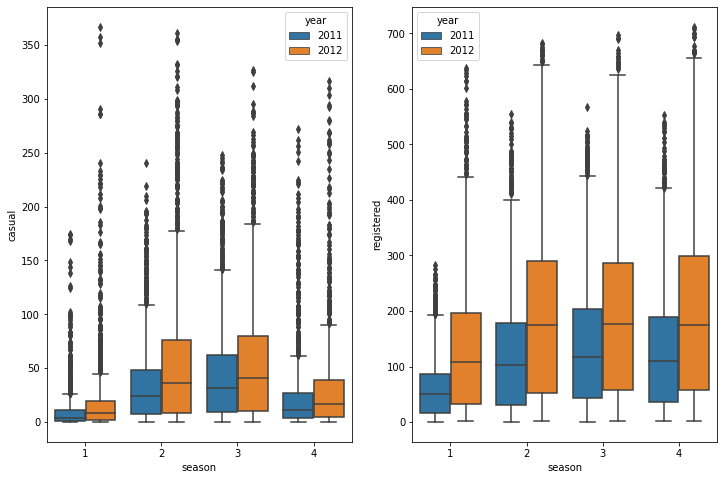

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sn.boxplot(data=data[data['count'].notnull()],x='season',hue='year',y='casual')
plt.subplot(122)
sn.boxplot(data=data[data['count'].notnull()],x='season',hue='year',y='registered')
plt.show()

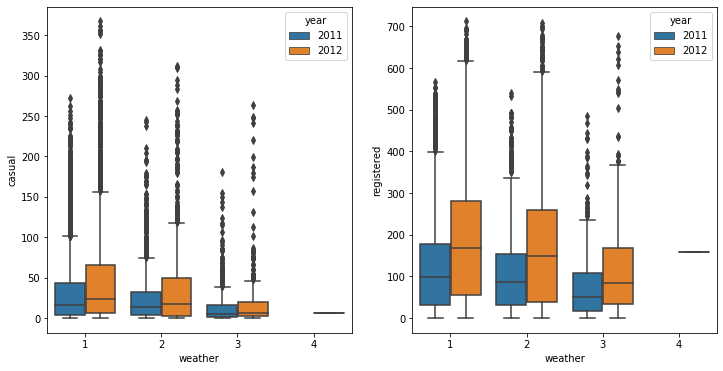

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sn.boxplot(data=data[data['count'].notnull()],x='weather',hue='year',y='casual')
plt.subplot(122)
sn.boxplot(data=data[data['count'].notnull()],x='weather',hue='year',y='registered')
plt.show()

In [30]:
dummies_month = pd.get_dummies(data['month'], prefix= 'month')
dummies_season = pd.get_dummies(data['season'], prefix= 'season')
dummies_weather = pd.get_dummies(data['weather'], prefix= 'weather')
dummies_year = pd.get_dummies(data['year'], prefix= 'year')

In [31]:
data=pd.concat([data,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)
data.shape

(17232, 40)

In [34]:
dataTrain = data[pd.notnull(data['count'])]
dataTest= data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels=dataTrain['count']
yLabels_log=np.log(yLabels)
dataTrain.shape

(10739, 40)

In [35]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 16364
Data columns (total 40 columns):
atemp            10739 non-null float64
casual           10739 non-null float64
count            10739 non-null float64
datetime         10739 non-null datetime64[ns]
holiday          10739 non-null int64
humidity         10739 non-null int64
registered       10739 non-null float64
season           10739 non-null int64
temp             10739 non-null float64
weather          10739 non-null int64
windspeed        10739 non-null float64
workingday       10739 non-null int64
year             10739 non-null int64
hour             10739 non-null int64
weekday          10739 non-null int64
date             10739 non-null object
month            10739 non-null int64
windspeed_rfr    10739 non-null float64
month_1          10739 non-null uint8
month_2          10739 non-null uint8
month_3          10739 non-null uint8
month_4          10739 non-null uint8
month_5          10739 non-null

In [36]:
dataTest.shape

(6493, 40)

In [37]:
dropFeatures = ['casual' , 'count' , 'datetime' , 'registered' , 'date' ,
                'windspeed' , 'atemp' ,'season','weather','month','year']

dataTrain = dataTrain.drop(dropFeatures,axis=1)
dataTest = dataTest.drop(dropFeatures,axis=1)

dataTrain.shape

(10739, 29)

In [38]:
dataTest.shape

(6493, 29)

In [ ]:
rfModel = RandomForestRegressor(n_estimators=1000 , random_state = 42)

rfModel.fit(dataTrain , yLabels_log)

preds = rfModel.predict( X = dataTrain)

In [ ]:
predsTest= rfModel.predict(X = dataTest)
submission=pd.DataFrame({'datetime':datetimecol , 'count':[max(0,x) for x in np.exp(predsTest)]})
submission.to_csv('bike_predictions.csv',index=False)